In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# **Elementy odstające (*ang. outliers*)**

**Elementy odstające** to punkty danych znalazujące się w znacznej odległości od grupy innych punktów - byty wyróżniające się z tłumu.

Problemy spowodowane outliersami:

* Długi czas uczenia modelu predykcyjnego
* Kiepska dokładność predykcji
* Zwiększenie błędu wariancji
* Zmniejszenie normalności rozkładu danych
* Osłabienie mocy testów statystycznych

## Typy elementów odstających

**1. OUTLIERSY JEDNOWYMIAROWE**

  * Występują w rozkładach opisujących jedną zmienną
  
  * Przykład: wynagrodzenia pracowników w jednej firmie
  
  * Łatwo widoczne na histogramach i wykresach pudełkowych

**2. OUTLIERSY WIELOWYMIAROWE**

 * Znajdują się w przestrzeniach n-wymiarowych

 * Przykład: dane klientów (wiek, dochód, wydatki)

 * Trudniejsze do wykrycia bez specjalnych metod

# **Metody wykrywania elementów odstających**

### **Metoda 1**: Wykres pudełkowy


* Tworzy podział punktów ze względu na kwartyle (Q1, Q2, Q3)

* Dane między Q1 a Q3 umieszczane w prostokątnych pudełkach

* Elementy odstające wyświetlane jako pojedyncze punkty poza pudełkiem

* Pokazuje rozstęp ćwiartkowy (IQR)

**Zalety**:

* Wizualna reprezentacja

* Szybkie zidentyfikowanie outliersów

* Porównanie wielu zmiennych



### **Metoda 2**: Wykres punktowy

* Wyświetla punkty na dwuwymiarowym układzie współrzędnych
* Jedna zmienna na osi X, druga na osi Y
* Idealny do wizualizacji relacji między dwoma zmiennymi
* Anomalie widoczne jako izolowane punkty daleko od klastera

**Zalety**:

* Łatwa identyfikacja outlierów wielowymiarowych
* Wizualna analiza trendów
* Pokazuje korelacje między zmiennymi

### **Metoda 3**: Wynik standaryzowany Z-score
**Formuła:**

z = (x - μ) / σ

Gdzie:

x = wartość danych,
μ = średnia (mean),
σ = odchylenie standardowe (standard deviation)

**Reguła**:

|z| > 3 → element odstający (99.7% danych powinno mieć |z| ≤ 3)

|z| > 2.5 → potencjalny outlier

**Założenia:**

* Rozkład normalny danych

* Metoda parametryczna

### **Metoda 4**: Rozstęp ćwiartkowy (IQR)
**Formuła:**
  IQR = Q3 - Q1

Gdzie: Q1 = pierwszy kwartyl (25. percentyl), Q3 = trzeci kwartyl (75. percentyl)

**Zasada outliersów**:

* Dolny limit: Q1 - 1.5 × IQR

* Górny limit: Q3 + 1.5 × IQR

* Wartości poza limitami = outliersy

**Zalety**:

* Odporna miara (mało wrażliwa na ekstrema)
* Nie wymaga założenia o rozkładzie normalnym
* Metoda nieparametryczna



### **Metoda 5**: Percentyl

**Percentyl** dzieli dane na 100 grup o równych rozmiarach. Wartość percentyla określa procent populacji znajdujący się poniżej tej wartości.

**Przykłady**:

* 1. percentyl: bardzo niskie wartości
* 50. percentyl: mediana
* 99. percentyl: bardzo wysokie wartości



**Reguła outliersów**:

* Wartości poniżej 1. percentyla → outliersy niskie
* Wartości powyżej 99. percentyla → outliersy wysokie
* Można również użyć 5. i 95. percentyla

## **PODSUMOWANIE**

1. **CO TO OUTLIER?**
   
   Punkt danych daleko od głównej grupy, wyróżniający się z tłumu

2. **DLACZEGO WAŻNY?**
   
   Psuje modele, zmniejsza dokładność, zwiększa błąd

3. **METODY WYKRYWANIA:**

    * Boxplot (wykres pudełkowy)

    * Scatter plot (wykres punktowy)

    * Z-score (standaryzacja)

    * IQR (rozstęp ćwiartkowy)

    * Percentyle

4. **KLUCZOWE TERMINY:**
Q1, Q3, IQR, σ (sigma), μ (mu), z-score, outlier

## **Przykład praktyczny**

**Dane**:
Wynagrodzenia pracowników (tys. zł): 2.5, 2.8, 3.0, 3.2, 3.5, 4.0, 4.2, 4.5, 5.0, 15.0


In [ ]:
# Dane: wynagrodzenia (tys. zł)
dane = np.array([2.5, 2.8, 3.0, 3.2, 3.5, 4.0, 4.2, 4.5, 5.0, 15.0])
print("\n1. DANE TESTOWE:")
print(f"   Wynagrodzenia: {dane}")
print(f"   Liczba obserwacji: {len(dane)}")


1. DANE TESTOWE:
   Wynagrodzenia: [ 2.5  2.8  3.   3.2  3.5  4.   4.2  4.5  5.  15. ]
   Liczba obserwacji: 10


In [ ]:
print("\n" + "="*60)
print("METODA 1: WYKRES PUDEŁKOWY (BOXPLOT - IQR)")
print("="*60)

Q1 = np.percentile(dane, 25)
Q3 = np.percentile(dane, 75)
IQR = Q3 - Q1
dolny_limit = Q1 - 1.5 * IQR
gorny_limit = Q3 + 1.5 * IQR

print(f"\nQ1 (25. percentyl) = {Q1:.2f}")
print(f"Q3 (75. percentyl) = {Q3:.2f}")
print(f"IQR = Q3 - Q1 = {IQR:.2f}")
print(f"\nLimity dla outliersów:")
print(f"  Dolny limit = Q1 - 1.5 × IQR = {Q1:.2f} - 1.5 × {IQR:.2f} = {dolny_limit:.2f}")
print(f"  Górny limit = Q3 + 1.5 × IQR = {Q3:.2f} + 1.5 × {IQR:.2f} = {gorny_limit:.2f}")

outliersy_iqr = dane[(dane < dolny_limit) | (dane > gorny_limit)]
print(f"\n✓ OUTLIERSY WYKRYTE (metoda IQR): {outliersy_iqr}")


METODA 1: WYKRES PUDEŁKOWY (BOXPLOT - IQR)

Q1 (25. percentyl) = 3.05
Q3 (75. percentyl) = 4.42
IQR = Q3 - Q1 = 1.38

Limity dla outliersów:
  Dolny limit = Q1 - 1.5 × IQR = 3.05 - 1.5 × 1.38 = 0.99
  Górny limit = Q3 + 1.5 × IQR = 4.42 + 1.5 × 1.38 = 6.49

✓ OUTLIERSY WYKRYTE (metoda IQR): [15.]


In [ ]:
print("\n" + "="*60)
print("METODA 2: Z-SCORE")
print("="*60)

srednia = np.mean(dane)
std_dev = np.std(dane, ddof=1)  # ddof=1 dla próby
z_scores = np.abs(stats.zscore(dane))

print(f"\nŚrednia (μ) = {srednia:.2f}")
print(f"Odchylenie standardowe (σ) = {std_dev:.2f}")
print(f"\nFormuła: z = (x - μ) / σ")
print(f"\nZ-score dla każdej wartości:")

for i, (wartosc, z) in enumerate(zip(dane, z_scores)):
    status = "⚠️ OUTLIER" if z > 3 else ""
    print(f"  {wartosc:5.1f} → z = {z:6.2f} {status}")

outliersy_z = dane[z_scores > 3]
print(f"\n✓ OUTLIERSY WYKRYTE (z > 3): {outliersy_z}")


METODA 2: Z-SCORE

Średnia (μ) = 4.77
Odchylenie standardowe (σ) = 3.68

Formuła: z = (x - μ) / σ

Z-score dla każdej wartości:
    2.5 → z =   0.65 
    2.8 → z =   0.56 
    3.0 → z =   0.51 
    3.2 → z =   0.45 
    3.5 → z =   0.36 
    4.0 → z =   0.22 
    4.2 → z =   0.16 
    4.5 → z =   0.08 
    5.0 → z =   0.07 
   15.0 → z =   2.93 

✓ OUTLIERSY WYKRYTE (z > 3): []


In [ ]:
print("\n" + "="*60)
print("METODA 3: PERCENTYL")
print("="*60)

p1 = np.percentile(dane, 1)
p99 = np.percentile(dane, 99)
p5 = np.percentile(dane, 5)
p95 = np.percentile(dane, 95)

print(f"\n1. percentyl = {p1:.2f}")
print(f"5. percentyl = {p5:.2f}")
print(f"95. percentyl = {p95:.2f}")
print(f"99. percentyl = {p99:.2f}")

print(f"\nOutliersy poniżej 1. percentyla: {dane[dane < p1]}")
print(f"Outliersy powyżej 99. percentyla: {dane[dane > p99]}")


METODA 3: PERCENTYL

1. percentyl = 2.53
5. percentyl = 2.63
95. percentyl = 10.50
99. percentyl = 14.10

Outliersy poniżej 1. percentyla: [2.5]
Outliersy powyżej 99. percentyla: [15.]


In [ ]:
print("\n" + "="*60)
print("PODSUMOWANIE - PORÓWNANIE METOD")
print("="*60)

print(f"\n{'Metoda':<25} {'Wykryte outliersy':<30} {'Liczba'}")
print("-" * 60)
print(f"{'IQR':<25} {str(outliersy_iqr):<30} {len(outliersy_iqr)}")
print(f"{'Z-score (|z| > 3)':<25} {str(outliersy_z):<30} {len(outliersy_z)}")
print(f"{'Percentyl (1-99%)':<25} {str(dane[(dane < p1) | (dane > p99)]):<30} {len(dane[(dane < p1) | (dane > p99)])}")


PODSUMOWANIE - PORÓWNANIE METOD

Metoda                    Wykryte outliersy              Liczba
------------------------------------------------------------
IQR                       [15.]                          1
Z-score (|z| > 3)         []                             0
Percentyl (1-99%)         [ 2.5 15. ]                    2


In [ ]:
print("\n" + "="*60)
print("PRZYKŁAD 2: DANE WIELOWYMIAROWE")
print("="*60)

dane_2d = np.array([
    [25, 30000],  # wiek, dochód (tys. zł)
    [27, 32000],
    [26, 31000],
    [28, 33000],
    [30, 35000],
    [28, 250000],  # ← OUTLIER!
])

df = pd.DataFrame(dane_2d, columns=['Wiek', 'Dochód'])
print("\nDane klientów (Wiek, Dochód w tys. zł):")
print(df.to_string(index=False))

# Z-score dla każdej kolumny
z_scores_wiek = np.abs(stats.zscore(df['Wiek']))
z_scores_dochod = np.abs(stats.zscore(df['Dochód']))

outliersy_2d = df[(z_scores_wiek > 2) | (z_scores_dochod > 2)]
print(f"\n✓ OUTLIERSY WIELOWYMIAROWE (z > 2 dla dowolnej zmiennej):")
print(outliersy_2d.to_string())



PRZYKŁAD 2: DANE WIELOWYMIAROWE

Dane klientów (Wiek, Dochód w tys. zł):
 Wiek  Dochód
   25   30000
   27   32000
   26   31000
   28   33000
   30   35000
   28  250000

✓ OUTLIERSY WIELOWYMIAROWE (z > 2 dla dowolnej zmiennej):
   Wiek  Dochód
5    28  250000


## Wizualizacja analizy

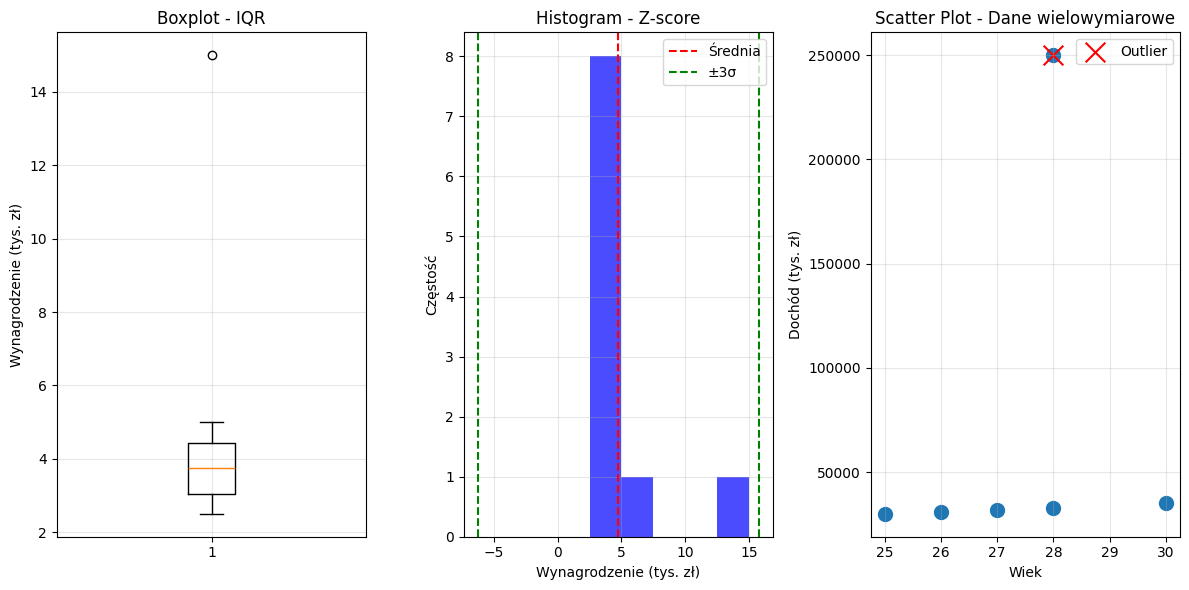

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.boxplot(dane)
plt.ylabel('Wynagrodzenie (tys. zł)')
plt.title('Boxplot - IQR')
plt.grid(True, alpha=0.3)

# Histogram z Z-score
plt.subplot(1, 3, 2)
plt.hist(dane, bins=5, alpha=0.7, color='blue')
plt.axvline(srednia, color='red', linestyle='--', label='Średnia')
plt.axvline(srednia + 3*std_dev, color='green', linestyle='--', label='±3σ')
plt.axvline(srednia - 3*std_dev, color='green', linestyle='--')
plt.xlabel('Wynagrodzenie (tys. zł)')
plt.ylabel('Częstość')
plt.title('Histogram - Z-score')
plt.legend()
plt.grid(True, alpha=0.3)

# Scatter plot 2D
plt.subplot(1, 3, 3)
plt.scatter(dane_2d[:, 0], dane_2d[:, 1], s=100)
plt.scatter(dane_2d[-1, 0], dane_2d[-1, 1], color='red', s=200, marker='x', label='Outlier')
plt.xlabel('Wiek')
plt.ylabel('Dochód (tys. zł)')
plt.title('Scatter Plot - Dane wielowymiarowe')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **Zadanie 1**


Pracujesz w firmie zajmującej się e-commerce. Otrzymałeś dane o sprzedaży
dziennej (liczba sztuk) z ostatnich 30 dni.


ZADANIE:
- Wczytaj dane sprzedażowe
- Zrób wizualizację danych
- Zastosuj metodę IQR, z-score oraz opartą na percentylach (1-99%)
- Zidentyfikuj outliersów
- Wyjaśnij co mogło się stać



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia wizualizacji
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Wczytanie danych
df_sprzedaz = pd.read_csv('sprzedaz_dzienna.csv')

# Usunięcie zbędnej kolumny, jeśli istnieje
if 'Unnamed: 0' in df_sprzedaz.columns:
    df_sprzedaz = df_sprzedaz.drop('Unnamed: 0', axis=1)

print("Pierwsze 5 wierszy danych:")
display(df_sprzedaz.head())

print("\nPodstawowe statystyki opisowe:")
display(df_sprzedaz['sprzedaz'].describe())


Pierwsze 5 wierszy danych:


,dzien,sprzedaz,dzien_tygodnia
0,1,65,Pn
1,2,71,Wt
2,3,69,Sr
3,4,73,Cz
4,5,74,Pt



Podstawowe statystyki opisowe:


,sprzedaz
count,28.000000
mean,71.750000
std,55.987846
min,35.000000
25%,43.500000
50%,69.500000
75%,72.000000
max,348.000000


rok 2: Wizualizacja danych
Stworzymy wykres liniowy, aby zobaczyć trend sprzedaży w czasie, oraz wykres pudełkowy, który pomoże wizualnie zidentyfikować wartości odstające.

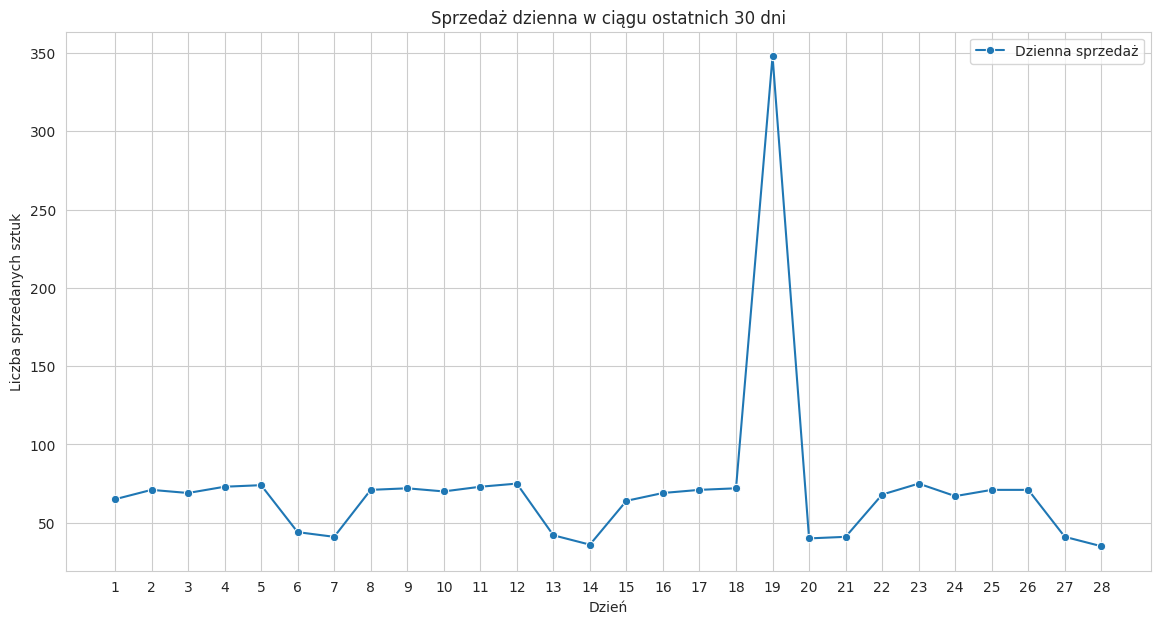

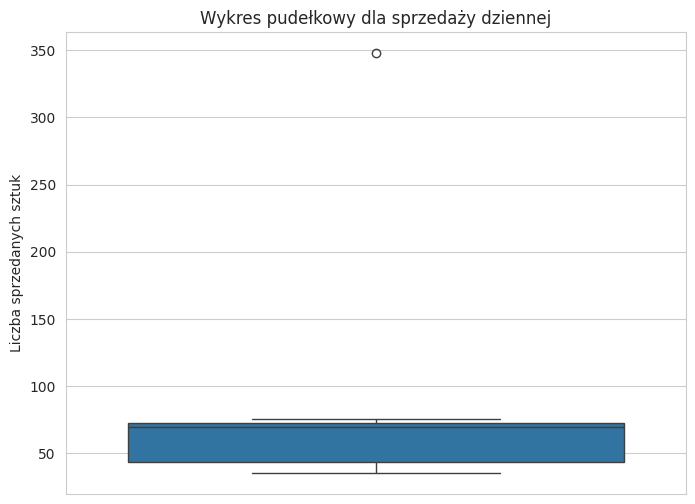

In [ ]:
# Wykres liniowy sprzedaży w czasie
plt.figure(figsize=(14, 7))
sns.lineplot(x='dzien', y='sprzedaz', data=df_sprzedaz, marker='o', label='Dzienna sprzedaż')
plt.title('Sprzedaż dzienna w ciągu ostatnich 30 dni')
plt.xlabel('Dzień')
plt.ylabel('Liczba sprzedanych sztuk')
plt.xticks(np.arange(min(df_sprzedaz['dzien']), max(df_sprzedaz['dzien'])+1, 1))
plt.legend()
plt.show()

# Wykres pudełkowy
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_sprzedaz['sprzedaz'])
plt.title('Wykres pudełkowy dla sprzedaży dziennej')
plt.ylabel('Liczba sprzedanych sztuk')
plt.show()

Оbserwacja wizualna: Na obu wykresach widać jeden dzień ze sprzedażą znacznie przewyższającą pozostałe. Wykres pudełkowy wyraźnie klasyfikuje ten punkt jako wartość odstającą.
Krok 3: Identyfikacja wartości odstających (Outliers)
Zastosujemy trzy popularne metody do numerycznego zidentyfikowania outlierów.
Metoda 1: Reguła IQR (rozstęp międzykwartylowy)

In [ ]:
print("--- Metoda IQR ---")
Q1 = df_sprzedaz['sprzedaz'].quantile(0.25)
Q3 = df_sprzedaz['sprzedaz'].quantile(0.75)
IQR = Q3 - Q1

dolna_granica = Q1 - 1.5 * IQR
gorna_granica = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Dolna granica (dopuszczalna): {dolna_granica}")
print(f"Górna granica (dopuszczalna): {gorna_granica}\n")

outliers_iqr = df_sprzedaz[(df_sprzedaz['sprzedaz'] < dolna_granica) | (df_sprzedaz['sprzedaz'] > gorna_granica)]
print("Zidentyfikowane wartości odstające metodą IQR:")
display(outliers_iqr)

--- Metoda IQR ---
Q1: 43.5, Q3: 72.0, IQR: 28.5
Dolna granica (dopuszczalna): 0.75
Górna granica (dopuszczalna): 114.75

Zidentyfikowane wartości odstające metodą IQR:


,dzien,sprzedaz,dzien_tygodnia
18,19,348,Pt


Metoda 2

In [ ]:
print("\n--- Metoda Z-score ---")
df_sprzedaz['z_score'] = np.abs(stats.zscore(df_sprzedaz['sprzedaz']))

# Ustawiamy próg na 3 (standardowa wartość)
prog_z_score = 3
outliers_zscore = df_sprzedaz[df_sprzedaz['z_score'] > prog_z_score]

print(f"Zidentyfikowane wartości odstające (Z-score > {prog_z_score}):")
display(outliers_zscore)


--- Metoda Z-score ---
Zidentyfikowane wartości odstające (Z-score > 3):


,dzien,sprzedaz,dzien_tygodnia,z_score
18,19,348,Pt,5.024648


Metoda 3: Metoda oparta na percentylach (1% - 99%)


In [ ]:
print("\n--- Metoda Percentyli (1-99%) ---")
dolny_percentyl = df_sprzedaz['sprzedaz'].quantile(0.01)
gorny_percentyl = df_sprzedaz['sprzedaz'].quantile(0.99)

print(f"Dolna granica (1 percentyl): {dolny_percentyl}")
print(f"Górna granica (99 percentyl): {gorny_percentyl}\n")

outliers_percentile = df_sprzedaz[(df_sprzedaz['sprzedaz'] < dolny_percentyl) | (df_sprzedaz['sprzedaz'] > gorny_percentyl)]

print("Zidentyfikowane wartości odstające metodą percentyli:")
display(outliers_percentile)


--- Metoda Percentyli (1-99%) ---
Dolna granica (1 percentyl): 35.27
Górna granica (99 percentyl): 274.29000000000013

Zidentyfikowane wartości odstające metodą percentyli:


,dzien,sprzedaz,dzien_tygodnia,z_score
18,19,348,Pt,5.024648
27,28,35,Nd,0.668437


Wszystkie trzy metody jednoznacznie wskazują na dzień 19 jako anomalię, gdzie sprzedaż wyniosła 348 sztuk, podczas gdy średnia sprzedaż to około 70 sztuk.

## **Zadanie 2**

Jesteś analitykiem w banku. Otrzymałeś dane o klientach zaciągających kredyty.
Każdy klient ma 4 cechy:
  1. Wiek (lata)
  2. Dochód roczny (tys. PLN)
  3. Suma kredytów (tys. PLN)
  4. Liczba lat jako klient

Do zrobienia:
- Zidentyfikować klientów wielowymiarowych outliersów
- Użyj metody z-score dla każdego wymiaru osobno



In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
df_klienci = pd.read_csv('klienci_banku.csv')

# Usunięcie zbędnej kolumny, jeśli istnieje
if 'Unnamed: 0' in df_klienci.columns:
    df_klienci = df_klienci.drop('Unnamed: 0', axis=1)

print("Pierwsze 5 wierszy danych o klientach:")
display(df_klienci.head())

print("\nOstatnie 10 wierszy danych (w poszukiwaniu anomalii):")
display(df_klienci.tail(10))

Pierwsze 5 wierszy danych o klientach:


,wiek_lat,dochod_roczny_tys,suma_kredytow_tys,lata_jako_klient
0,53.18,80.63,65.34,12.99
1,41.28,75.23,218.69,3.96
2,48.89,87.45,145.27,2.99
3,43.44,64.46,212.89,7.93
4,46.16,91.39,71.28,9.25



Ostatnie 10 wierszy danych (w poszukiwaniu anomalii):


,wiek_lat,dochod_roczny_tys,suma_kredytow_tys,lata_jako_klient
40,35.0,201.0,401.0,15.1
41,52.0,251.0,451.0,20.1
42,48.0,221.0,381.0,18.1
43,60.0,181.0,351.0,22.1
44,42.0,211.0,421.0,19.1
45,28.0,16.0,251.0,0.6
46,32.0,13.0,281.0,1.1
47,25.0,19.0,241.0,0.3
48,999.0,5001.0,10001.0,100.1
49,5.0,1.1,1.0,0.1


Krok 2: Identyfikacja Outlierów metodą Z-score
Zgodnie z poleceniem, użyjemy metody z-score dla każdej cechy osobno, aby zidentyfikować klientów z nietypowymi wartościami. Za outlier uznamy klienta, którego przynajmniej jedna cecha ma wartość z-score (w wartości bezwzględnej) powyżej 3.

In [ ]:
# Lista kolumn do analizy
cechy = ['wiek_lat', 'dochod_roczny_tys', 'suma_kredytow_tys', 'lata_jako_klient']

# Obliczanie z-score dla każdej cechy i dodawanie jako nowe kolumny
for col in cechy:
    col_zscore = col + '_zscore'
    df_klienci[col_zscore] = np.abs(stats.zscore(df_klienci[col]))

print("\nDane z obliczonymi wartościami z-score:")
display(df_klienci.tail(10))

# Definicja progu
prog = 3

# Identyfikacja outlierów
# Klient jest outlierem, jeśli którakolwiek z jego wartości z-score przekracza próg
outliers_filter = (df_klienci['wiek_lat_zscore'] > prog) | \
                  (df_klienci['dochod_roczny_tys_zscore'] > prog) | \
                  (df_klienci['suma_kredytow_tys_zscore'] > prog) | \
                  (df_klienci['lata_jako_klient_zscore'] > prog)

klienci_outliers = df_klienci[outliers_filter]

print(f"\nZidentyfikowani klienci-outlierzy (próg z-score > {prog}):")
display(klienci_outliers)


Dane z obliczonymi wartościami z-score:


,wiek_lat,dochod_roczny_tys,suma_kredytow_tys,lata_jako_klient,wiek_lat_zscore,dochod_roczny_tys_zscore,suma_kredytow_tys_zscore,lata_jako_klient_zscore
40,35.0,201.0,401.0,15.1,0.201551,0.016195,0.014648,0.382180
41,52.0,251.0,451.0,20.1,0.074980,0.088760,0.050946,0.744518
42,48.0,221.0,381.0,18.1,0.104761,0.045221,0.000128,0.599582
43,60.0,181.0,351.0,22.1,0.015416,0.012832,0.021651,0.889453
44,42.0,211.0,421.0,19.1,0.149434,0.030708,0.029167,0.672050
45,28.0,16.0,251.0,0.6,0.253669,0.252297,0.094247,0.668601
46,32.0,13.0,281.0,1.1,0.223888,0.256651,0.072468,0.632367
47,25.0,19.0,241.0,0.3,0.276005,0.247943,0.101506,0.690341
48,999.0,5001.0,10001.0,100.1,6.975810,6.982458,6.983890,6.541926
49,5.0,1.1,1.0,0.1,0.424913,0.273921,0.275738,0.704834



Zidentyfikowani klienci-outlierzy (próg z-score > 3):


,wiek_lat,dochod_roczny_tys,suma_kredytow_tys,lata_jako_klient,wiek_lat_zscore,dochod_roczny_tys_zscore,suma_kredytow_tys_zscore,lata_jako_klient_zscore
48,999.0,5001.0,10001.0,100.1,6.97581,6.982458,6.98389,6.541926


Wnioski:
Klient o ID 48: Wiek 999 lat, dochód ponad 5 milionów i suma kredytów ponad 10 milionów to wartości nierealistyczne. Jest to najprawdopodobniej błąd w danych lub rekord testowy, który powinien zostać usunięty ze zbioru.
Klient o ID 49: Wiek 5 lat i minimalne wartości finansowe również wskazują na błąd lub niepoprawny rekord.
Klienci o ID 40-44: Posiadają bardzo wysokie (choć potencjalnie możliwe) dochody i sumy kredytów w porównaniu do reszty zbioru.
Klienci o ID 45-47: Charakteryzują się bardzo niskimi wartościami dochodów i sum kredytów.
Te rekordy mogą znacząco wpłynąć na wyniki analiz statystycznych (np. średnią) i działanie modeli uczenia maszynowego. Przed dalszą analizą należałoby podjąć decyzję, co z nimi zrobić – usunąć (zwłaszcza wiersz 48) lub przeanalizować jako osobną, wyjątkową grupę klientów.

--- Wizualizacja jednowymiarowa: Wykresy pudełkowe ---


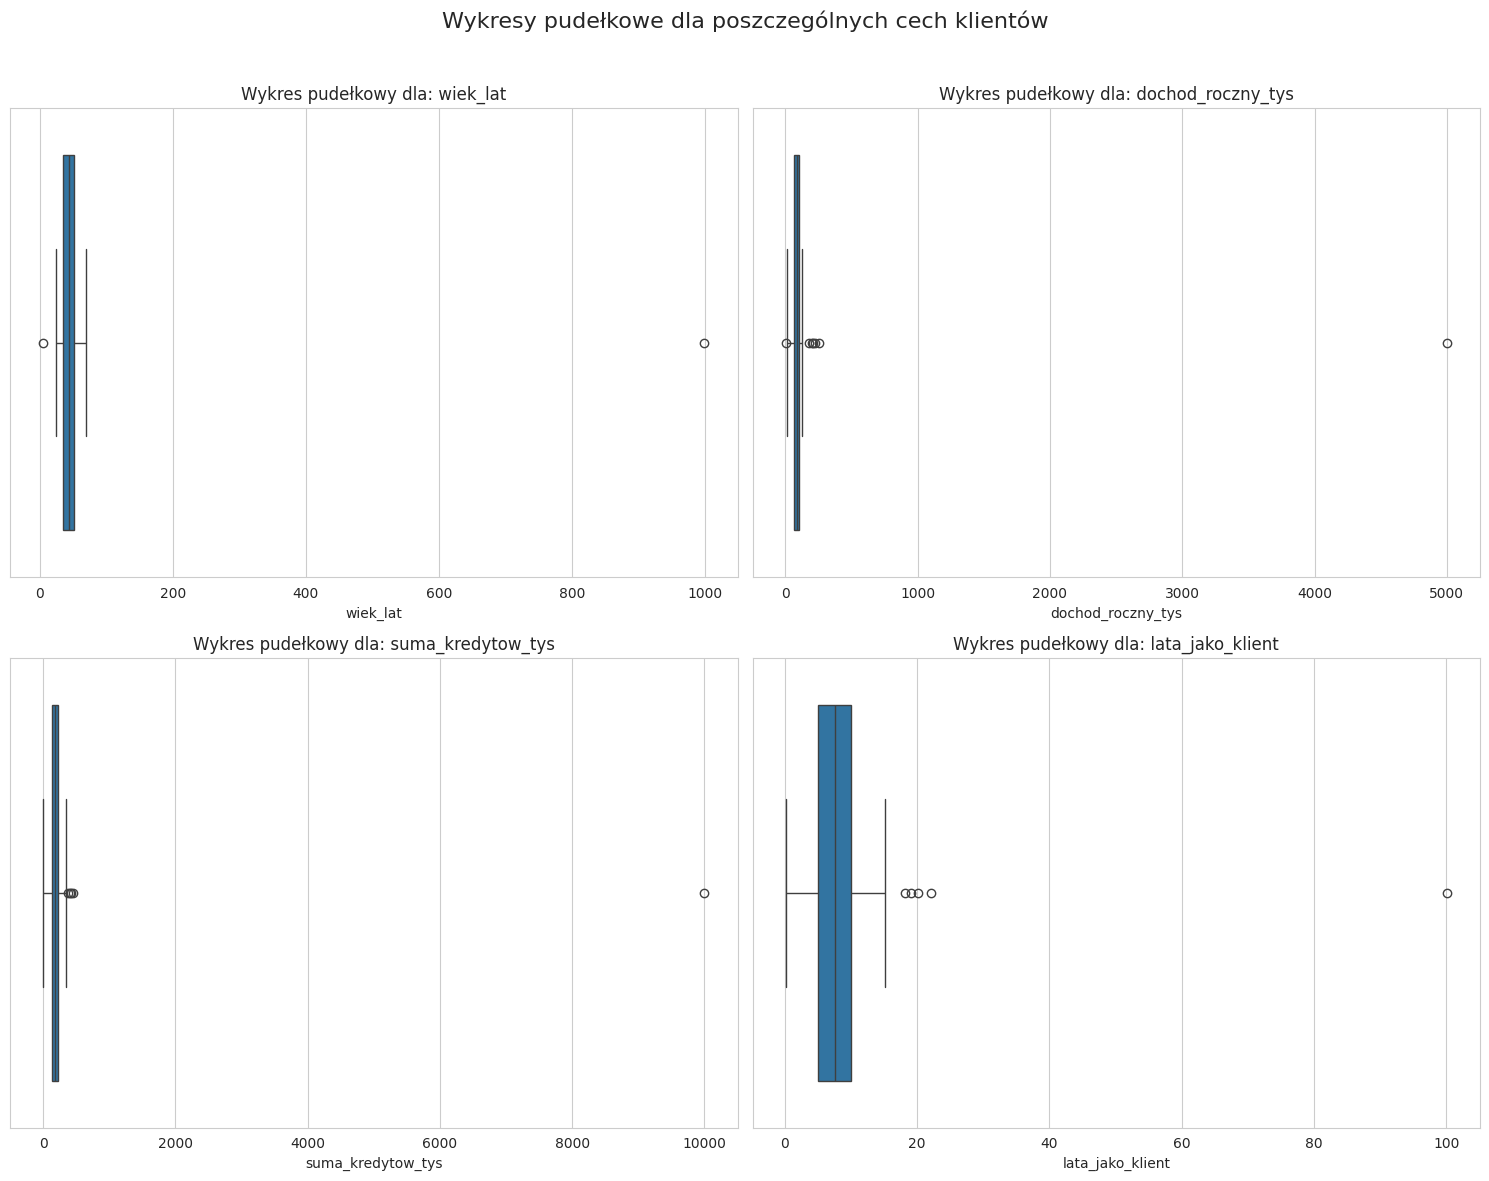


--- Wizualizacja wielowymiarowa: Pair Plot ---


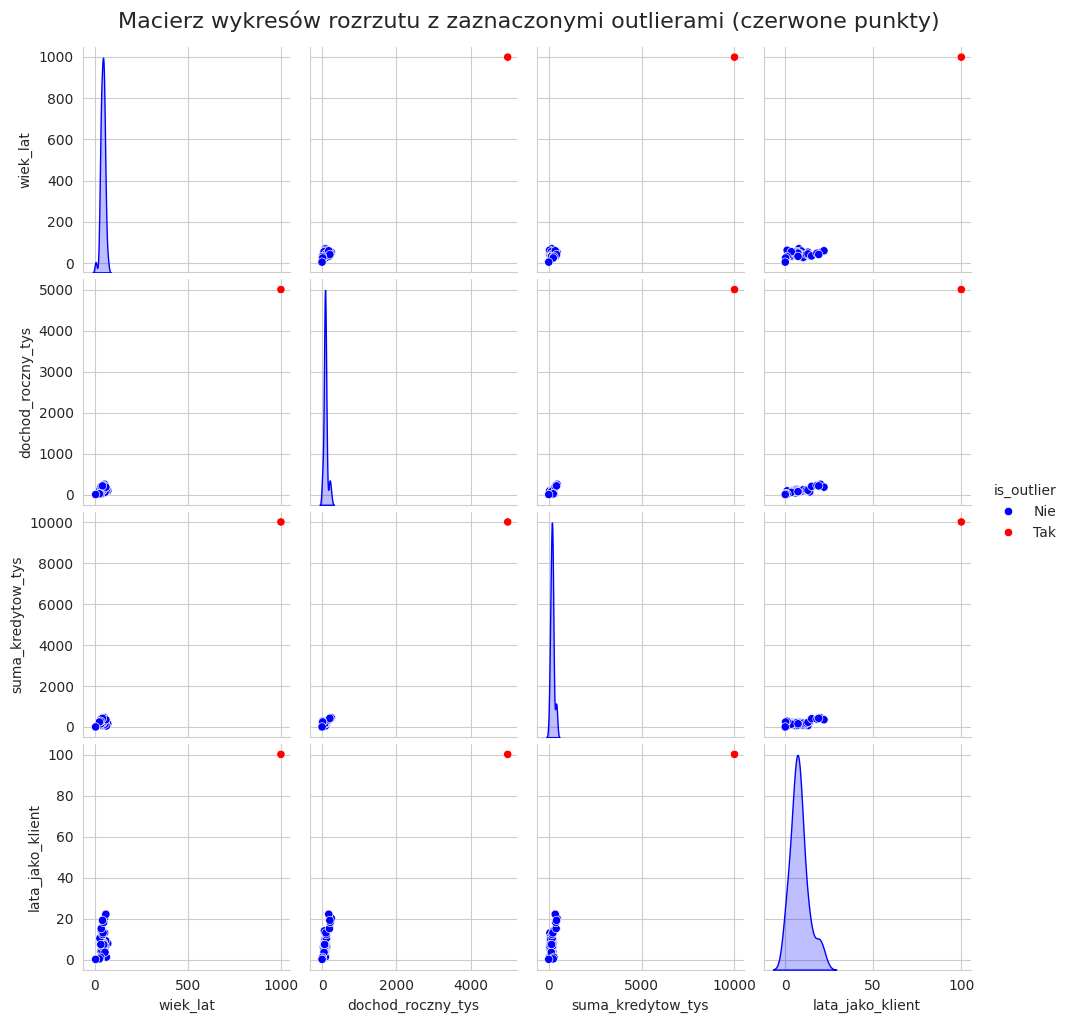

In [ ]:
print("--- Wizualizacja jednowymiarowa: Wykresy pudełkowe ---")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Wykresy pudełkowe dla poszczególnych cech klientów', fontsize=16)

# Lista cech do zwizualizowania
cechy = ['wiek_lat', 'dochod_roczny_tys', 'suma_kredytow_tys', 'lata_jako_klient']

# Tworzenie wykresów w pętli
for col, ax in zip(cechy, axes.flatten()):
    sns.boxplot(x=df_klienci[col], ax=ax)
    ax.set_title(f'Wykres pudełkowy dla: {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Metoda 2: Pair Plot do analizy wielowymiarowej ---

# Definicja progu i filtra (ponownie dla jasności)
prog = 3
outliers_filter = (df_klienci['wiek_lat_zscore'] > prog) | \
                  (df_klienci['dochod_roczny_tys_zscore'] > prog) | \
                  (df_klienci['suma_kredytow_tys_zscore'] > prog) | \
                  (df_klienci['lata_jako_klient_zscore'] > prog)

# Dodanie kolumny oznaczającej outliera
df_klienci['is_outlier'] = np.where(outliers_filter, 'Tak', 'Nie')

print("\n--- Wizualizacja wielowymiarowa: Pair Plot ---")
# Tworzenie macierzy wykresów z zaznaczonymi outlierami
pair_plot = sns.pairplot(
    data=df_klienci,
    vars=cechy,  # Używamy oryginalnych kolumn
    hue='is_outlier',  # Kolorujemy punkty na podstawie tego, czy są outlierami
    palette={'Tak': 'red', 'Nie': 'blue'},  # Definiujemy kolory
    diag_kind='kde' # Wykresy gęstości na przekątnej
)
pair_plot.fig.suptitle("Macierz wykresów rozrzutu z zaznaczonymi outlierami (czerwone punkty)", y=1.02, fontsize=16)
plt.show()